<a href="https://colab.research.google.com/github/2203a54013/AIML-B-39/blob/main/Assignment_4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# import libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

In [3]:
# import dataset
df = pd.read_csv("water_potability.csv")

In [4]:
# preview top of dataset
df.head()

ph    Hardness       Solids  Chloramines     Sulfate  Conductivity  \
0       NaN  204.890456  20791.31898     7.300212  368.516441    564.308654   
1  3.716080  129.422921  18630.05786     6.635246         NaN    592.885359   
2  8.099124  224.236259  19909.54173     9.275884         NaN    418.606213   
3  8.316766  214.373394  22018.41744     8.059332  356.886136    363.266516   
4  9.092223  181.101509  17978.98634     6.546600  310.135738    398.410813   

   Organic_carbon  Trihalomethanes  Turbidity  Potability  
0       10.379783        86.990970   2.963135           0  
1       15.180013        56.329076   4.500656           0  
2       16.868637        66.420093   3.055934           0  
3       18.436525       100.341674   4.628771           0  
4       11.558279        31.997993   4.075075           0

In [5]:
# preview the bottom of dataset
df.tail()

ph    Hardness       Solids  Chloramines     Sulfate  \
3271  4.668102  193.681736  47580.99160     7.166639  359.948574   
3272  7.808856  193.553212  17329.80216     8.061362         NaN   
3273  9.419510  175.762646  33155.57822     7.350233         NaN   
3274  5.126763  230.603758  11983.86938     6.303357         NaN   
3275  7.874671  195.102299  17404.17706     7.509306         NaN   

      Conductivity  Organic_carbon  Trihalomethanes  Turbidity  Potability  
3271    526.424171       13.894419        66.687695   4.435821           1  
3272    392.449580       19.903225              NaN   2.798243           1  
3273    432.044783       11.039070        69.845400   3.298875           1  
3274    402.883113       11.168946        77.488213   4.708658           1  
3275    327.459761       16.140368        78.698446   2.309149           1

In [6]:
# dimensions: there are 3,276 observations and 10 columns
df.shape

(3276, 10)

In [7]:
# columns
print(f'There are {len(df.columns)} columns: {df.columns}')

There are 10 columns: Index(['ph', 'Hardness', 'Solids', 'Chloramines', 'Sulfate', 'Conductivity',
       'Organic_carbon', 'Trihalomethanes', 'Turbidity', 'Potability'],
      dtype='object')


In [9]:
# convert all columns to lowercase
df.columns = df.columns.str.lower()

# New Section

In [10]:
# inspect datatypes and non-null values
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3276 entries, 0 to 3275
Data columns (total 10 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   ph               2785 non-null   float64
 1   hardness         3276 non-null   float64
 2   solids           3276 non-null   float64
 3   chloramines      3276 non-null   float64
 4   sulfate          2495 non-null   float64
 5   conductivity     3276 non-null   float64
 6   organic_carbon   3276 non-null   float64
 7   trihalomethanes  3114 non-null   float64
 8   turbidity        3276 non-null   float64
 9   potability       3276 non-null   int64  
dtypes: float64(9), int64(1)
memory usage: 256.1 KB


In [11]:
# duplicated values: None
df.duplicated().sum()

0

In [12]:
# cardinality assessment: lots of unique values since these are float types
# potability column is correct to only have 2 unique types (0=not potable; 1=potable)
df.nunique()

ph                 2785
hardness           3276
solids             3276
chloramines        3276
sulfate            2495
conductivity       3276
organic_carbon     3276
trihalomethanes    3114
turbidity          3276
potability            2
dtype: int64

In [13]:
# count of missing values
print(df.isna().sum())
print(df.isna().sum()/df.shape[0]*100)

ph                 491
hardness             0
solids               0
chloramines          0
sulfate            781
conductivity         0
organic_carbon       0
trihalomethanes    162
turbidity            0
potability           0
dtype: int64
ph                 14.987790
hardness            0.000000
solids              0.000000
chloramines         0.000000
sulfate            23.840049
conductivity        0.000000
organic_carbon      0.000000
trihalomethanes     4.945055
turbidity           0.000000
potability          0.000000
dtype: float64


In [14]:
# use KNN to impute missing values
from sklearn.impute import KNNImputer
imputer = KNNImputer()
imputed = imputer.fit_transform(df[['ph','sulfate','trihalomethanes']])
imputed

array([[  6.74664184, 368.5164413 ,  86.99097046],
       [  3.71608007, 334.5064952 ,  56.32907628],
       [  8.09912419, 321.76809734,  66.42009251],
       ...,
       [  9.41951032, 308.6805907 ,  69.84540029],
       [  5.12676292, 310.98472286,  77.4882131 ],
       [  7.87467136, 337.11816286,  78.69844633]])

In [15]:
# replace missing values with new data
df[['ph','sulfate','trihalomethanes']] = imputed
df.isna().sum()

ph                 0
hardness           0
solids             0
chloramines        0
sulfate            0
conductivity       0
organic_carbon     0
trihalomethanes    0
turbidity          0
potability         0
dtype: int64

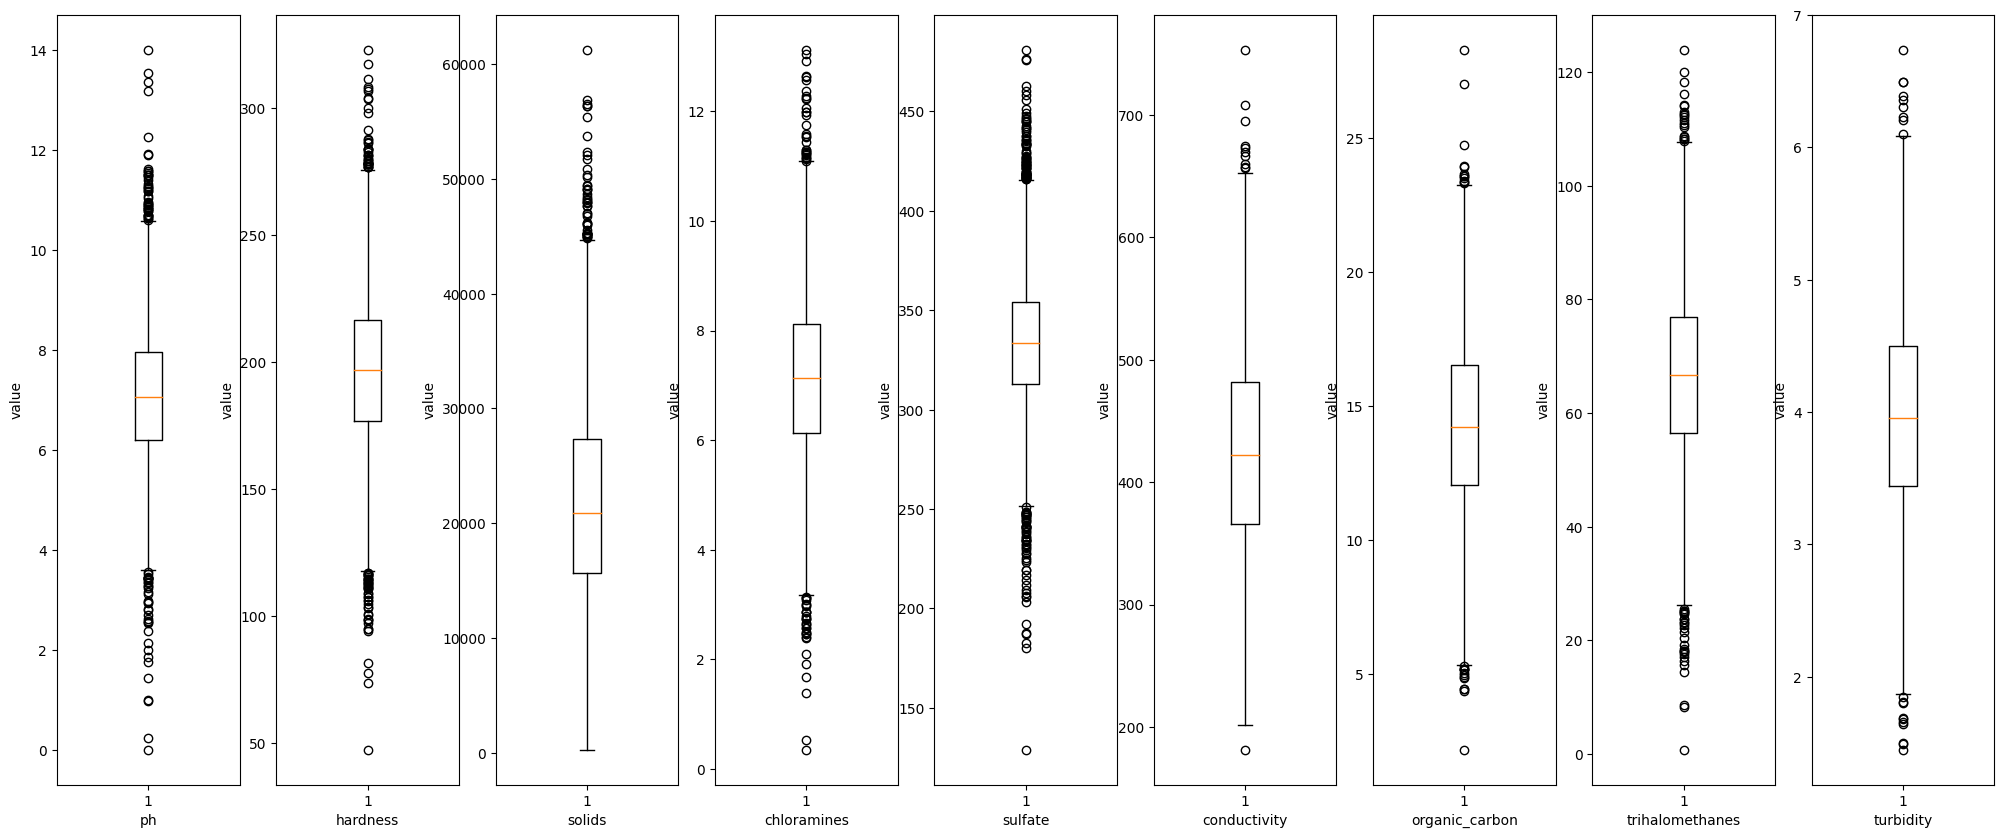

In [16]:
# outliers boxplot
plt.figure(figsize=(25,10))

features = df.columns[:-1]

for i, col in enumerate(features):
    plt.subplot(1, len(features) , i+1)
    x = df[col]
    plt.boxplot(x)
    plt.xlabel(col)
    plt.ylabel('value')

# Explotary Data **Analysis**

In [17]:
# descriptive statistics to spot any potential anomolies
df.describe()

ph     hardness        solids  chloramines      sulfate  \
count  3276.000000  3276.000000   3276.000000  3276.000000  3276.000000   
mean      7.079893   196.369496  22014.092526     7.122277   333.828804   
std       1.496123    32.879761   8768.570828     1.583085    37.156100   
min       0.000000    47.432000    320.942611     0.352000   129.000000   
25%       6.190856   176.850538  15666.690300     6.127421   312.820066   
50%       7.052451   196.967627  20927.833605     7.130299   333.673348   
75%       7.949103   216.667456  27332.762125     8.114887   353.991459   
max      14.000000   323.124000  61227.196010    13.127000   481.030642   

       conductivity  organic_carbon  trihalomethanes    turbidity   potability  
count   3276.000000     3276.000000      3276.000000  3276.000000  3276.000000  
mean     426.205111       14.284970        66.463416     3.966786     0.390110  
std       80.824064        3.308162        15.835029     0.780382     0.487849  
min      181.483754        2.200000         0.738000     1.450000     0.000000  
25%      365.734414       12.065801        56.463977     3.439711     0.000000  
50%      421.884968       14.218338        66.660416     3.955028     0.000000  
75%      481.792305       16.557652        76.995317     4.500320     1.000000  
max      753.342620       28.300000       124.000000     6.739000     1.000000

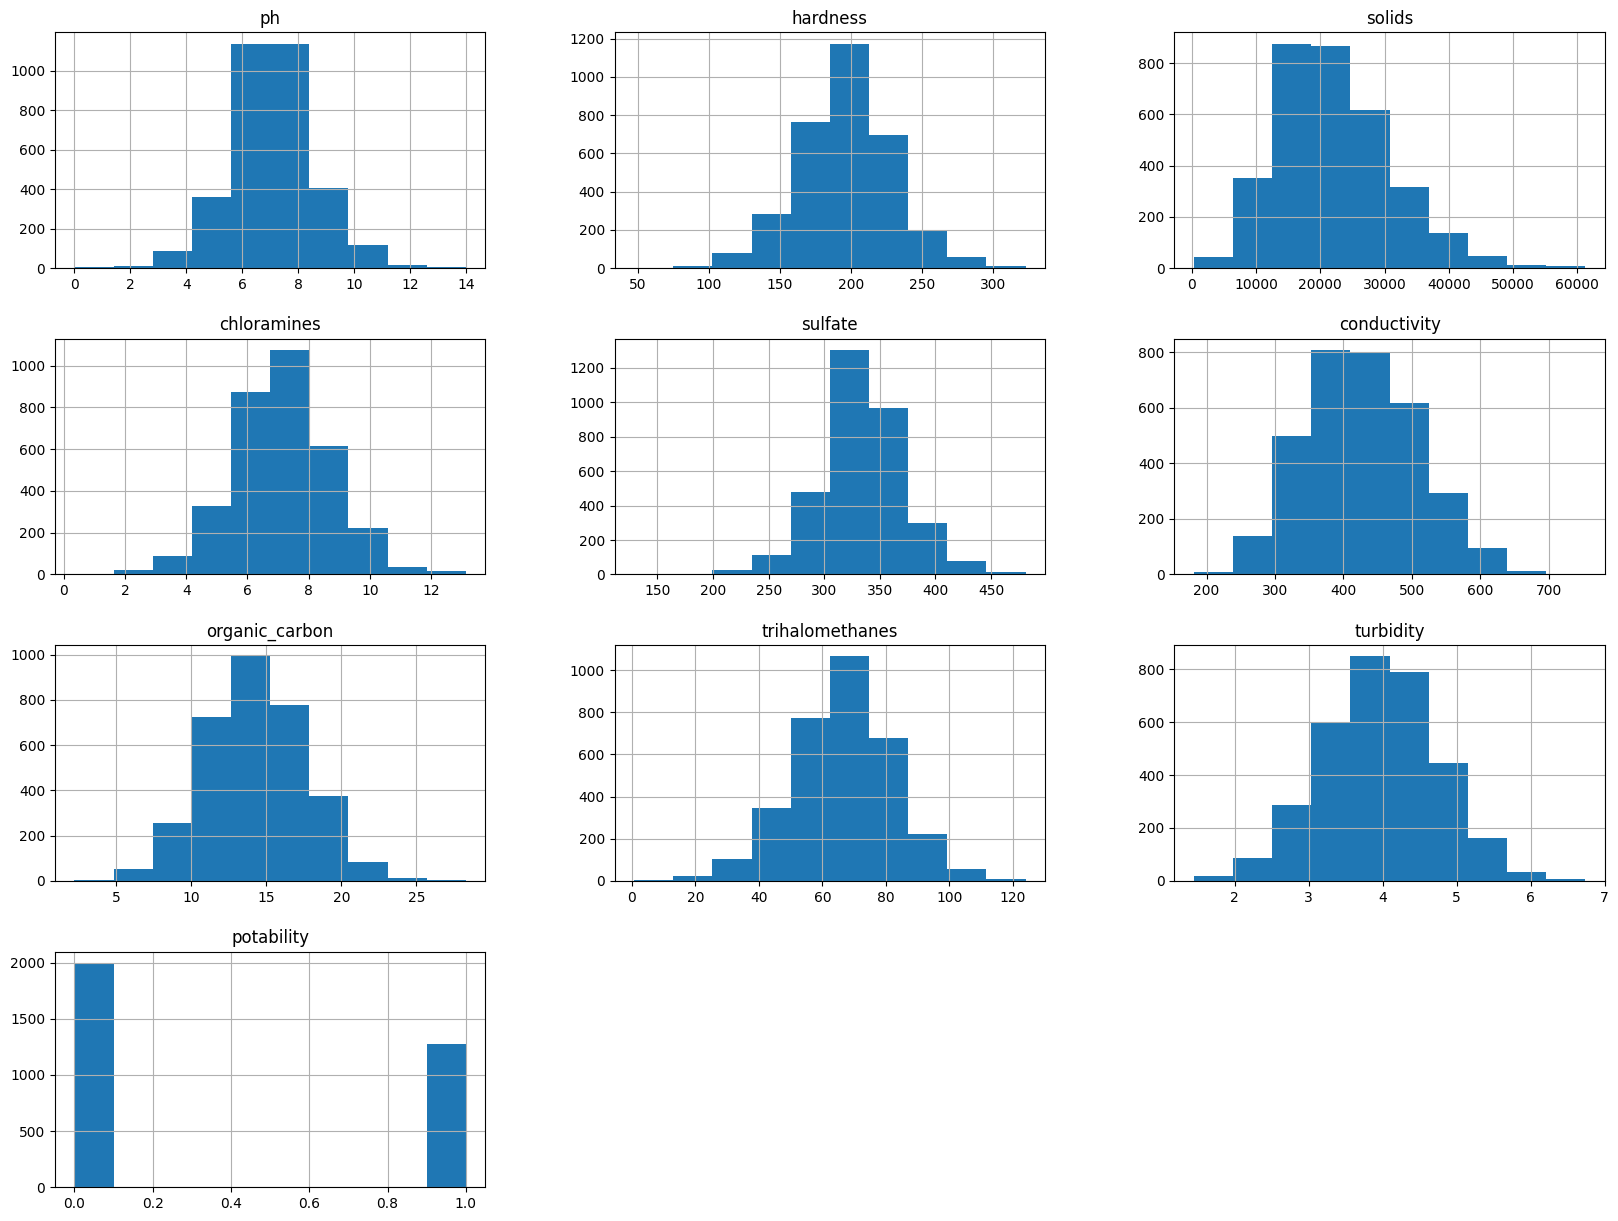

In [18]:
# histograms of all columns
df.hist(figsize=(20,15))
plt.show()

In [19]:
# skew of features
df.skew().round(2)[:-1]

ph                 0.03
hardness          -0.04
solids             0.62
chloramines       -0.01
sulfate           -0.04
conductivity       0.26
organic_carbon     0.03
trihalomethanes   -0.09
turbidity         -0.01
dtype: float64

In [21]:
print(f'Median for solids: {np.median(df["solids"]).round()}')

Median for solids: 20928.0


Text(0.5, 1.0, 'Pairplot of Water Potability Dataset')

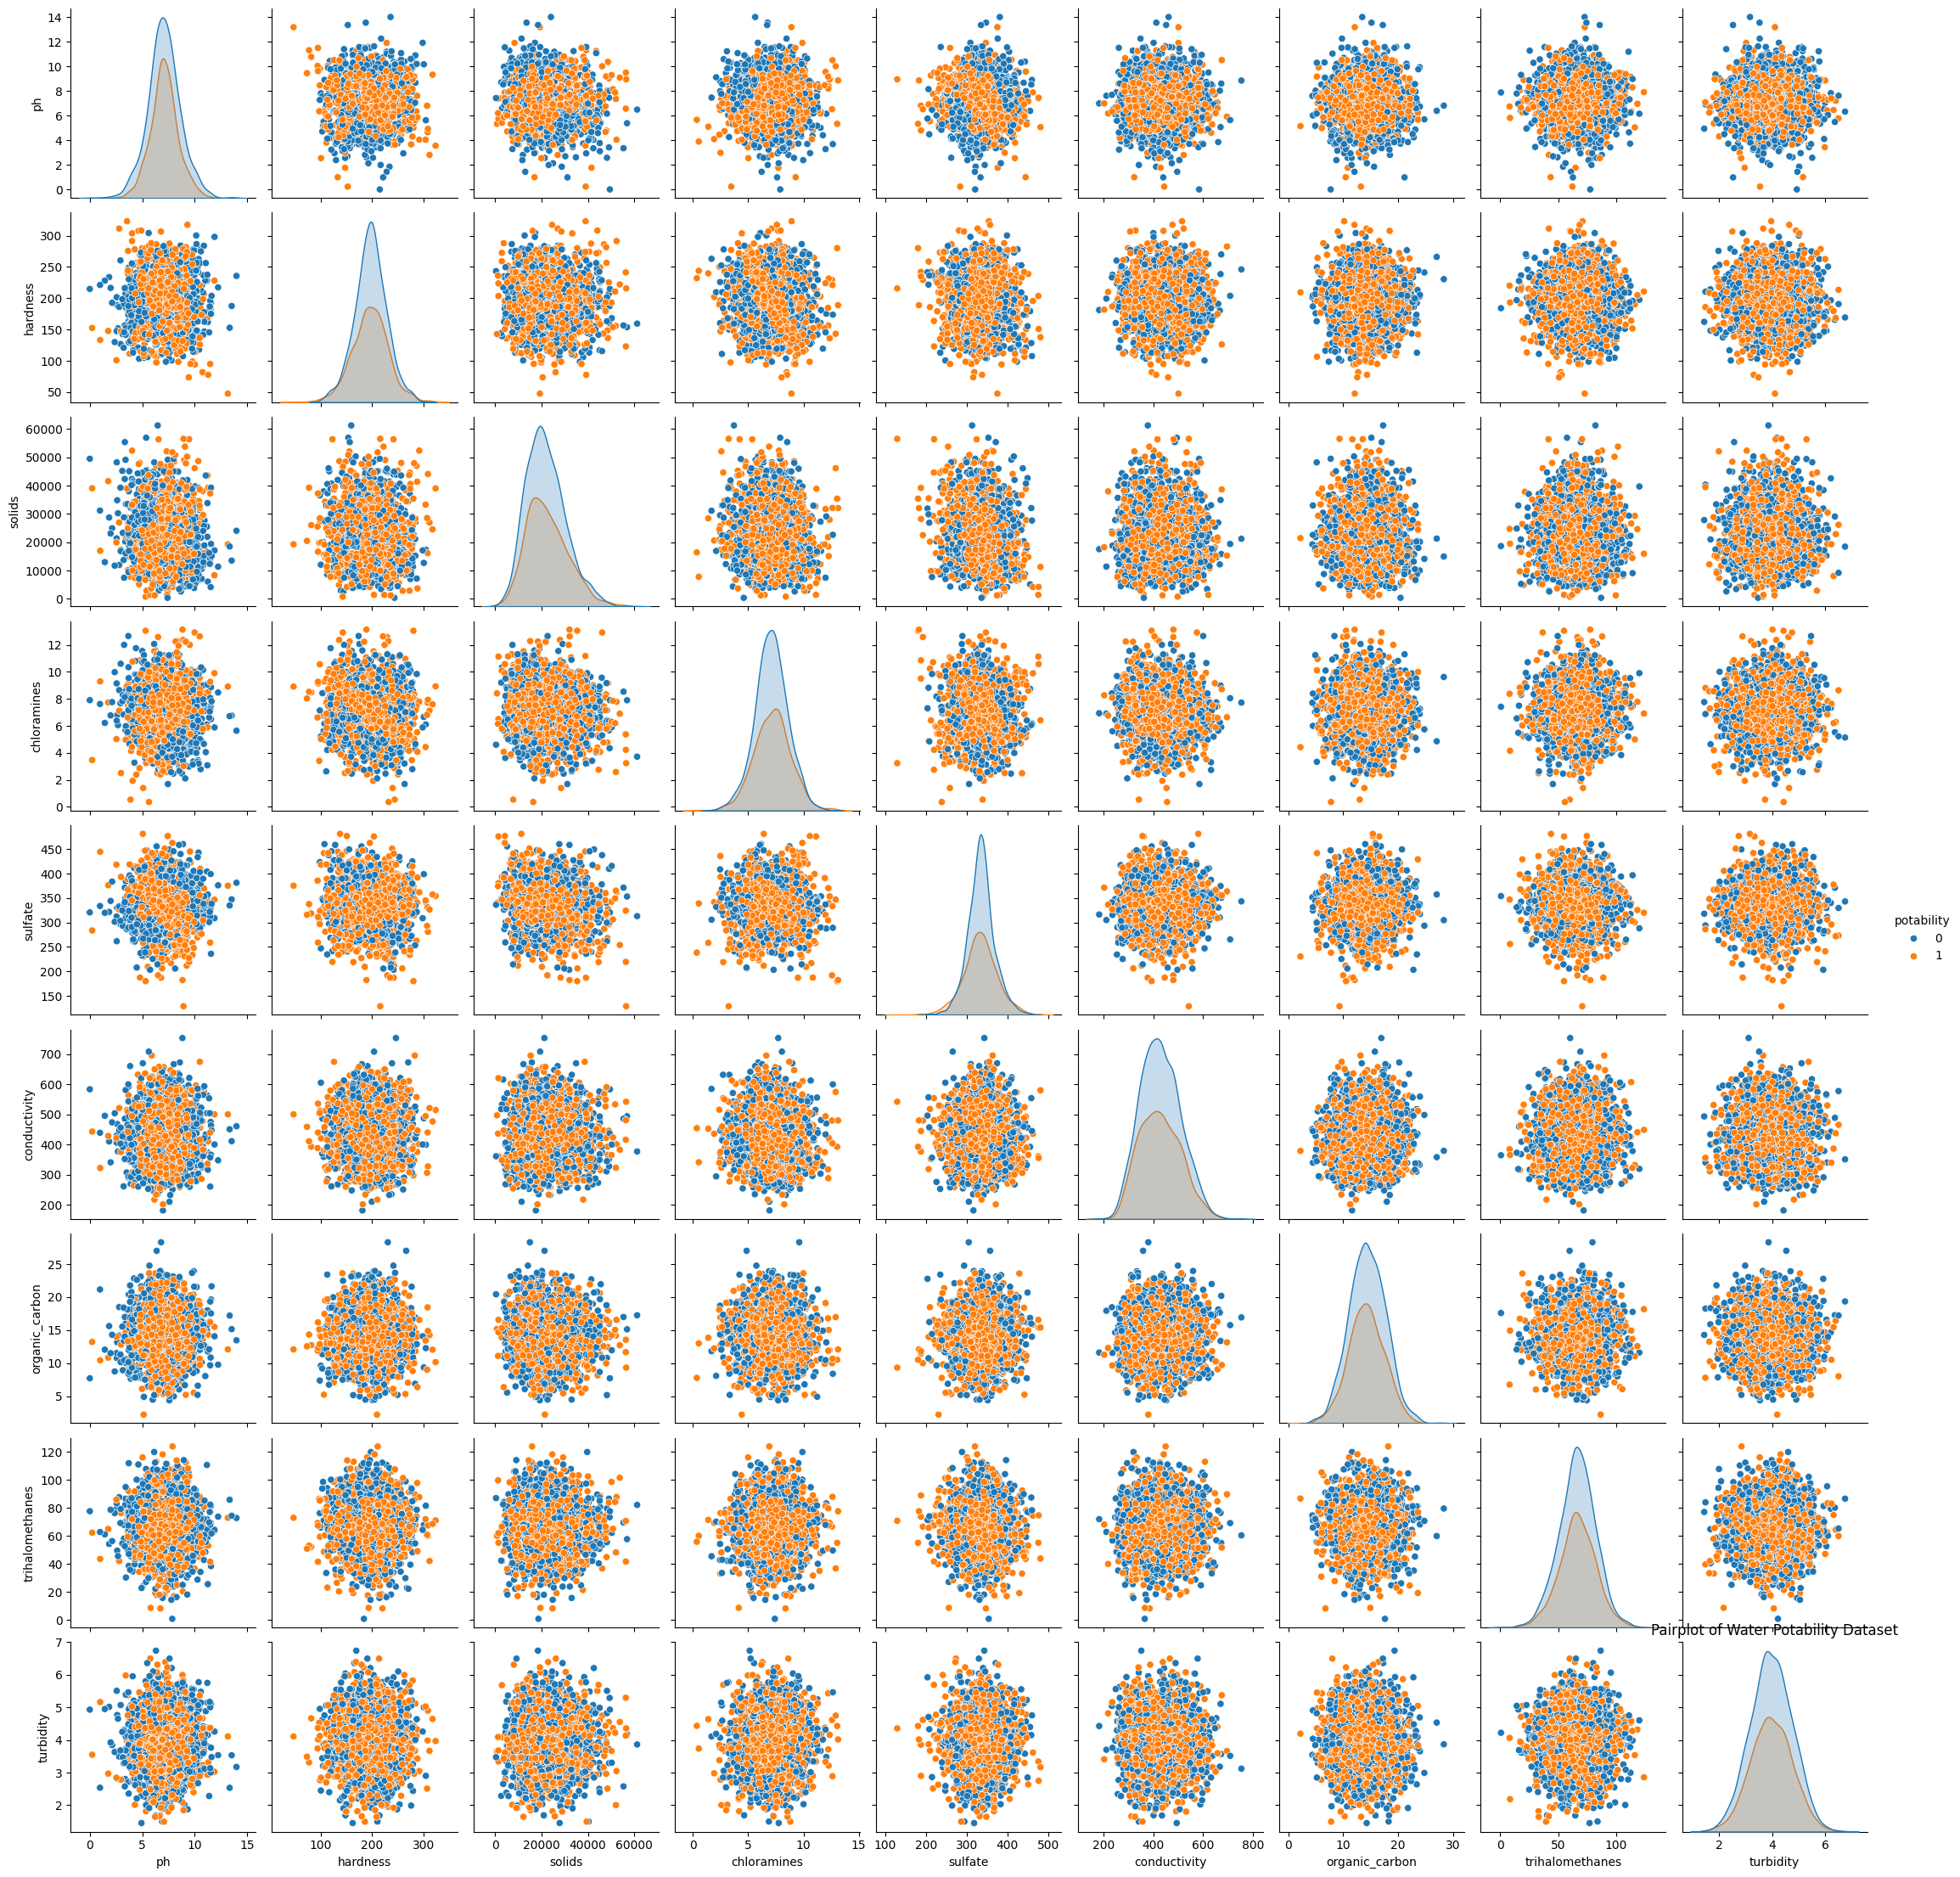

In [22]:
# pairplot of entire dataframe
sns.pairplot(df, hue='potability')
plt.title("Pairplot of Water Potability Dataset")

In [23]:
# correlation of features to target
cor = df.corr()['potability'].round(4)[:-1]
cor.sort_values()[::-1]

solids             0.0337
chloramines        0.0238
trihalomethanes    0.0064
ph                 0.0026
turbidity          0.0016
conductivity      -0.0081
hardness          -0.0138
sulfate           -0.0236
organic_carbon    -0.0300
Name: potability, dtype: float64

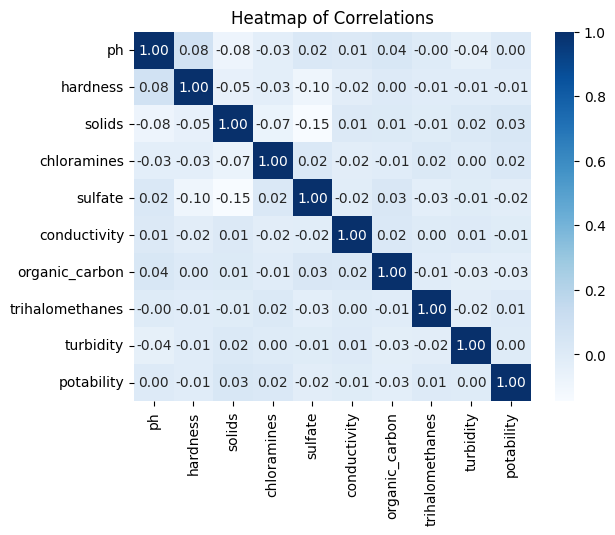

In [24]:
# heatmap
sns.heatmap(df.corr(), annot=True, fmt='.2f', cmap='Blues')
plt.title("Heatmap of Correlations")
plt.show()

Text(0.5, 1.0, 'Correlation of Features to Target')

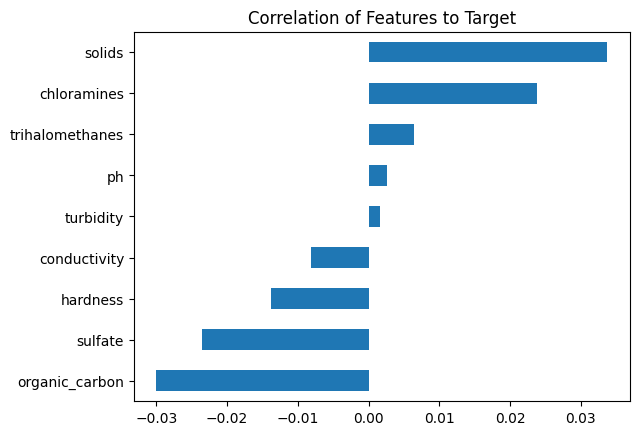

In [25]:
# barplot of pearson correlation with the target column
df.corr().loc['potability'][:-1].sort_values().plot.barh()
plt.title("Correlation of Features to Target")

In [26]:
# statistical significance of features using a pvalue of less than 0.05
from scipy.stats import pearsonr
for c in df.columns[:-1]:
    correlation, pvalue = pearsonr(df[c], df['potability'])
    print(f'alpha of 0.05, {c : <18}: {correlation : .2f}, significant: {pvalue < 0.05}')

alpha of 0.05, ph                :  0.00, significant: False
alpha of 0.05, hardness          : -0.01, significant: False
alpha of 0.05, solids            :  0.03, significant: False
alpha of 0.05, chloramines       :  0.02, significant: False
alpha of 0.05, sulfate           : -0.02, significant: False
alpha of 0.05, conductivity      : -0.01, significant: False
alpha of 0.05, organic_carbon    : -0.03, significant: False
alpha of 0.05, trihalomethanes   :  0.01, significant: False
alpha of 0.05, turbidity         :  0.00, significant: False


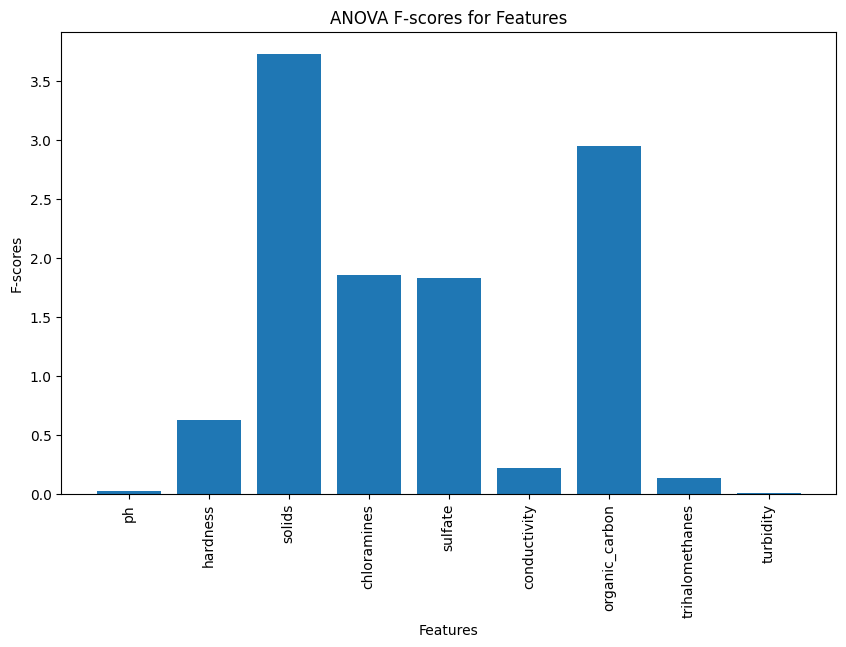

In [27]:
# bar chart of F-scores

# seperate features & targets
features = df.drop('potability', axis=1)
target = df['potability']

# import f_classif
from sklearn.feature_selection import f_classif
f_scores, p_values = f_classif(features, target)

# visualize f-scores
plt.figure(figsize=(10, 6))
plt.bar(features.select_dtypes(include=np.number).columns, f_scores)
plt.title('ANOVA F-scores for Features')
plt.xlabel('Features')
plt.ylabel('F-scores')
plt.xticks(rotation=90)
plt.show()

In [28]:
# potability over solids
over_solids = df[df['solids'] > 1000]

0    1997
1    1277
Name: potability, dtype: int64 3274


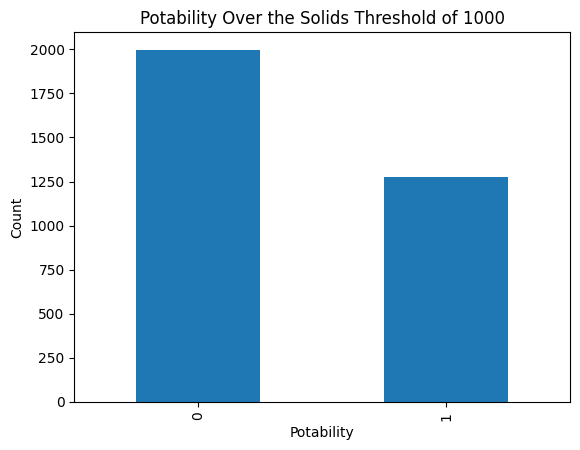

In [29]:
# potability over solids chart
over_solids['potability'].value_counts().plot.bar()
plt.title("Potability Over the Solids Threshold of 1000")
plt.xlabel("Potability")
plt.ylabel("Count")
print(over_solids["potability"].value_counts(), over_solids.shape[0])

In [30]:
# records below/above organic carbon thresholds
over_oc = df[(df['organic_carbon'] > 4) | (df['organic_carbon'] < 2)]

0    1998
1    1277
Name: potability, dtype: int64 3275


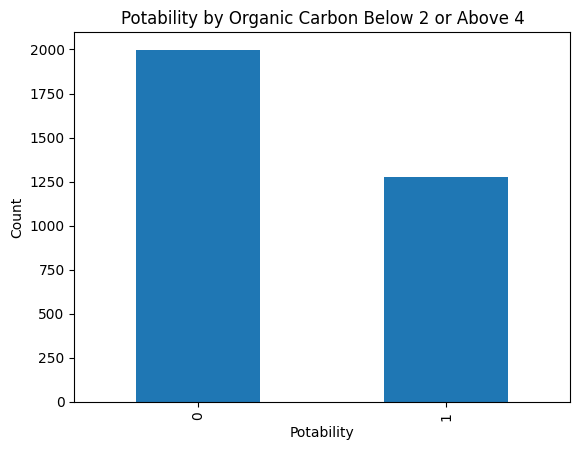

In [31]:
# potability by ph below/above threshold
over_oc['potability'].value_counts().plot.bar()
plt.title("Potability by Organic Carbon Below 2 or Above 4")
plt.xlabel("Potability")
plt.ylabel("Count")
print(over_oc['potability'].value_counts(), over_oc.shape[0])

In [32]:
# binning pH for further EDA
dfph = df.copy()
dfph['ph_level'] = pd.cut(df['ph'], bins=[0, 6.5, 8.5, 14], labels=['acidic', 'neutral', 'alkaline'])
dfph.head()

ph    hardness       solids  chloramines     sulfate  conductivity  \
0  6.746642  204.890456  20791.31898     7.300212  368.516441    564.308654   
1  3.716080  129.422921  18630.05786     6.635246  334.506495    592.885359   
2  8.099124  224.236259  19909.54173     9.275884  321.768097    418.606213   
3  8.316766  214.373394  22018.41744     8.059332  356.886136    363.266516   
4  9.092223  181.101509  17978.98634     6.546600  310.135738    398.410813   

   organic_carbon  trihalomethanes  turbidity  potability  ph_level  
0       10.379783        86.990970   2.963135           0   neutral  
1       15.180013        56.329076   4.500656           0    acidic  
2       16.868637        66.420093   3.055934           0   neutral  
3       18.436525       100.341674   4.628771           0   neutral  
4       11.558279        31.997993   4.075075           0  alkaline

Text(0.5, 1.0, 'pH Count')

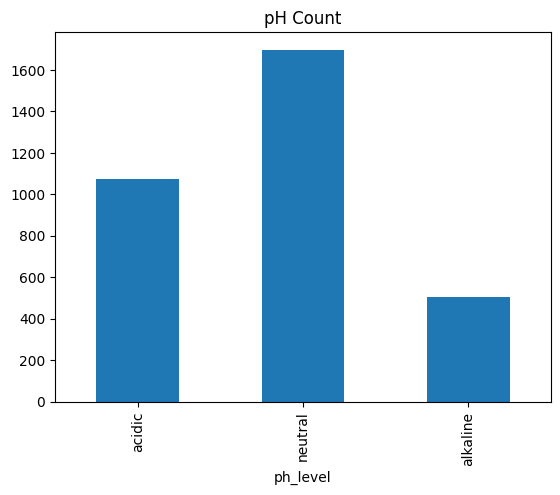

In [33]:
ph = dfph.groupby('ph_level').agg('count')['potability']
ph.plot.bar()
plt.title("pH Count")

In [34]:
# ph count
ph


ph_level
acidic      1074
neutral     1697
alkaline     504
Name: potability, dtype: int64

In [35]:
# potability by mean features
avg_potability = df.groupby('potability').agg('mean').reset_index()

Text(0.5, 1.0, 'Average pH by Potability')

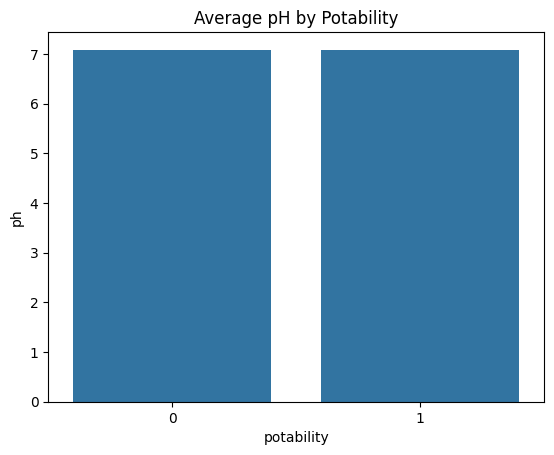

In [36]:
# solids barplot
sns.barplot(data=avg_potability, x='potability', y='ph')
plt.title("Average pH by Potability")

In [37]:
# average features by potability
avg_potability

potability        ph    hardness        solids  chloramines     sulfate  \
0           0  7.076789  196.733292  21777.490788     7.092175  334.530322   
1           1  7.084746  195.800744  22383.991018     7.169338  332.732066   

   conductivity  organic_carbon  trihalomethanes  turbidity  
0    426.730454       14.364335        66.381944   3.965800  
1    425.383800       14.160893        66.590789   3.968328

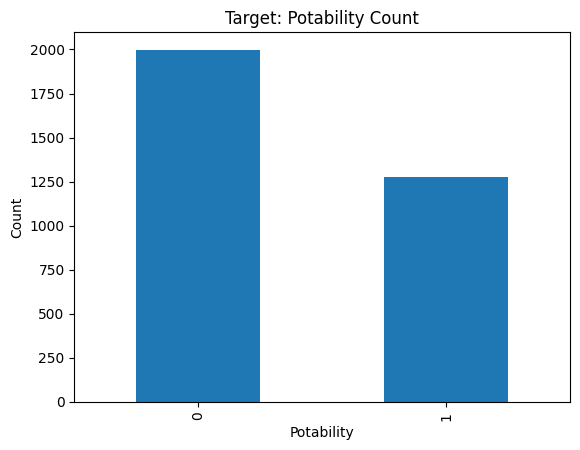

In [38]:
# target variable: potability count
df['potability'].value_counts().plot.bar()
plt.title("Target: Potability Count")
plt.xlabel("Potability")
plt.ylabel("Count")
plt.show()

In [39]:
# percentage of imbalance/no information rate
print(df['potability'].value_counts())
print(round(df['potability'].value_counts()/df.shape[0]*100,1))

0    1998
1    1278
Name: potability, dtype: int64
0    61.0
1    39.0
Name: potability, dtype: float64


In [40]:
# seperate features from target
X = df.drop('potability', axis=1)
y = df['potability']

In [41]:
# Split the data into training and testing sets
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

In [44]:
# Scale the data
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.fit_transform(X_test)

# Bootstrapping

In [45]:
# bootstrapping
from imblearn.over_sampling import RandomOverSampler
ros = RandomOverSampler(random_state=42)
X_train, y_train = ros.fit_resample(X_train, y_train)

# Machine learning

In [46]:
# import the KNN algorithm
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier()

# hyperparameters dictionary
hyperparameters = {'n_neighbors': [1, 3, 5, 7, 9, 11, 13, 15],
                   'weights': ['uniform', 'distance'],
                   'p': [1, 2]}

# GridSearchCV
from sklearn.model_selection import GridSearchCV
gs = GridSearchCV(knn, hyperparameters, scoring='accuracy', n_jobs=-1)

# GridSearchCV to data
gs.fit(X, y)

# best estimator, best parameters, and best score
print("Best Estimator:", gs.best_estimator_)
print("Best Parameters:", gs.best_params_)
print("Best Score:", gs.best_score_)

Best Estimator: KNeighborsClassifier(n_neighbors=15, p=1, weights='distance')
Best Parameters: {'n_neighbors': 15, 'p': 1, 'weights': 'distance'}
Best Score: 0.5866933531930739


In [47]:
# Initialize the model with the best hyperparameters
knn_model = KNeighborsClassifier(n_neighbors=15, p=1, weights='distance')
# Fit the model
knn_model.fit(X_train, y_train.values.ravel())

KNeighborsClassifier(n_neighbors=15, p=1, weights='distance')

In [48]:
# Assess performance on the training and test sets
print(f'Train score: {knn_model.score(X_train, y_train)}')
print(f'Test score: {knn_model.score(X_test, y_test)}')

Train score: 1.0
Test score: 0.6288156288156288


In [49]:
# import evaluation metrics
from sklearn.metrics import classification_report, accuracy_score

In [50]:
# Predict
ypred_knn = knn_model.predict(X_test)

In [51]:
# Evaluation of accuracy
print("Accuracy Score: ", accuracy_score(y_test, ypred_knn))
print(classification_report(y_test, ypred_knn))

Accuracy Score:  0.6288156288156288
              precision    recall  f1-score   support

           0       0.71      0.68      0.69       510
           1       0.51      0.55      0.53       309

    accuracy                           0.63       819
   macro avg       0.61      0.61      0.61       819
weighted avg       0.64      0.63      0.63       819



In [52]:
# import yellowbrick.classifier
from yellowbrick.classifier import ConfusionMatrix, ClassificationReport

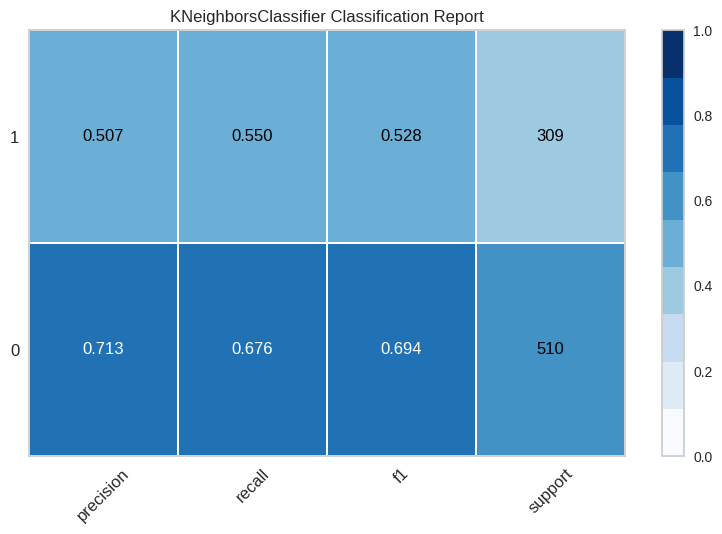

<Axes: title={'center': 'KNeighborsClassifier Classification Report'}>

In [53]:
# visualization of precision, recall, support, and f1 scores using Yellowbrick
knn_report = ClassificationReport(knn_model, classes=[0,1], support=True, cmap='Blues')
knn_report.score(X_test, y_test)
knn_report.show()

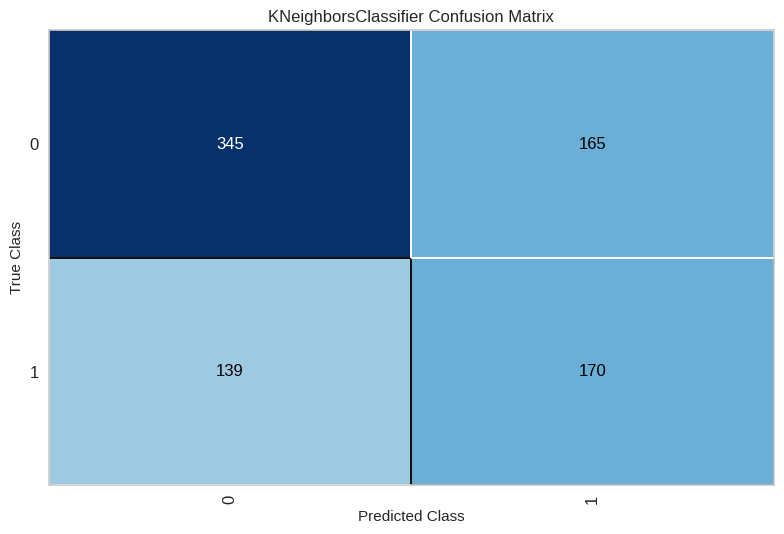

<Axes: title={'center': 'KNeighborsClassifier Confusion Matrix'}, xlabel='Predicted Class', ylabel='True Class'>

In [54]:
# confusion matrix
knn_cm = ConfusionMatrix(knn_model, classes=[0,1], cmap='Blues')
knn_cm.score(X_test, y_test)
knn_cm.show()

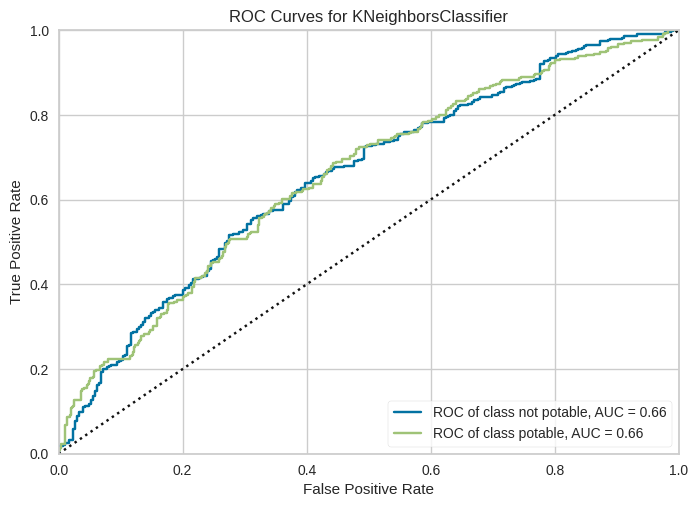

In [55]:
# plot the ROC AUC for KNN
from yellowbrick.classifier.rocauc import roc_auc
roc = roc_auc(knn_model,
              X_train,
              y_train,
              X_test,
              y_test,
              classes=['not potable', 'potable'],
              macro=False,
              micro=False)

In [56]:
# import the logistic regressor model
from sklearn.linear_model import LogisticRegression
logreg = LogisticRegression()

# hyperparameters dictionary
hyperparameters2 = {'solver': ['newton-cg', 'lbfgs', 'liblinear'],
                   'penalty': ['none', 'l1', 'l2', 'elasticnet'],
                   'C': [100, 10, 1.0, 0.1, 0.01]}

# GridSearchCV
gslog = GridSearchCV(logreg, hyperparameters2, scoring='accuracy', n_jobs=-1)

# GridSearchCV of data
gslog.fit(X, y)

# best estimator, best parameters, and best score
print("Best Estimator:", gslog.best_estimator_)
print("Best Parameters:", gslog.best_params_)
print("Best Score:", gslog.best_score_)

Best Estimator: LogisticRegression(C=100, penalty='none')
Best Parameters: {'C': 100, 'penalty': 'none', 'solver': 'lbfgs'}
Best Score: 0.6101954943213554


In [57]:
# sklearn logistic regression
log_model = LogisticRegression(C=100, penalty='none', solver='newton-cg')
log_model.fit(X_train, y_train)

LogisticRegression(C=100, penalty='none', solver='newton-cg')

In [58]:
# Assess performance on the training and test sets
print(f'Train score: {log_model.score(X_train, y_train)}')
print(f'Test score: {log_model.score(X_test, y_test)}')

Train score: 0.511760752688172
Test score: 0.5164835164835165


In [59]:
# predictions
log_pred = log_model.predict(X_test)

In [60]:
# evaluation of accuracy
print("Accuracy Score: ", accuracy_score(y_test, log_pred))
print(classification_report(y_test, log_pred))

Accuracy Score:  0.5164835164835165
              precision    recall  f1-score   support

           0       0.63      0.54      0.58       510
           1       0.39      0.49      0.43       309

    accuracy                           0.52       819
   macro avg       0.51      0.51      0.51       819
weighted avg       0.54      0.52      0.52       819



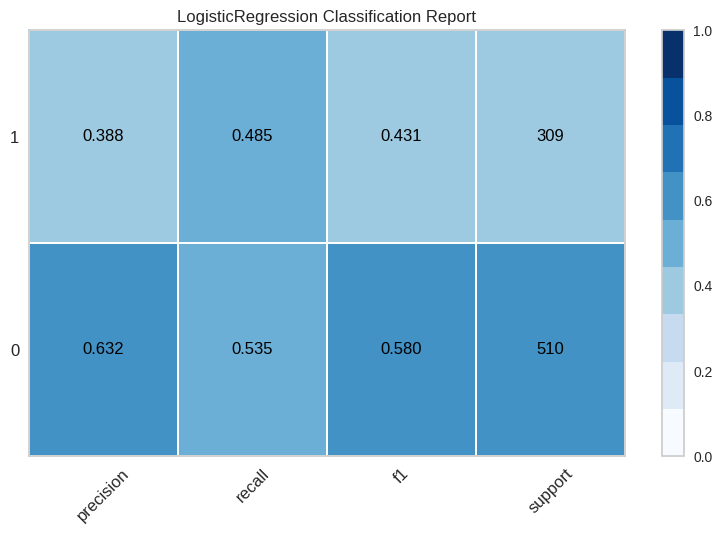

<Axes: title={'center': 'LogisticRegression Classification Report'}>

In [61]:
# visualization of precision, recall, support, and f1 scores using Yellowbrick
log_report = ClassificationReport(log_model, classes=[0,1], support=True, cmap='Blues')
log_report.score(X_test, y_test)
log_report.show()

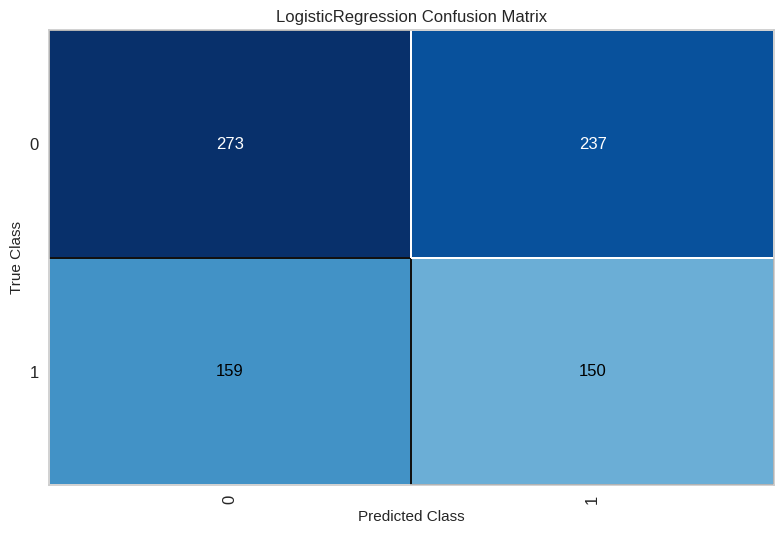

<Axes: title={'center': 'LogisticRegression Confusion Matrix'}, xlabel='Predicted Class', ylabel='True Class'>

In [62]:
# confusion matrix
log_cm = ConfusionMatrix(log_model, classes=[0,1], cmap='Blues')
log_cm.score(X_test, y_test)
log_cm.show()

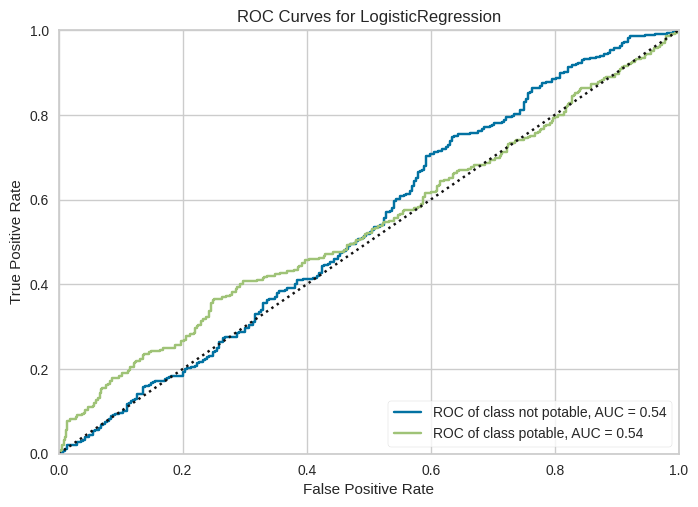

In [63]:
# plot the ROC AUC for logistic regression
from yellowbrick.classifier.rocauc import roc_auc
roc = roc_auc(log_model,
              X_train,
              y_train,
              X_test,
              y_test,
              classes=['not potable', 'potable'],
              macro=False,
              micro=False)